In [1]:
import datetime as dt
import pandas as pd
import os
import random

from datasources.etfdb import EtfDbResource
from charts.line_and_bar import line_and_bar_plot

### Get the daily inflows from ETFDB

In [2]:
etfdb = EtfDbResource()
df = etfdb.fund_flows('SOXL')
df.head()

,Date,Flow
0,2010-03-11,0.003969
1,2010-03-12,0.000000
2,2010-03-15,0.000000
3,2010-03-16,0.000000
4,2010-03-17,0.000000


### Get the chart data from Yahoo

In [3]:
from_ = int(dt.datetime(2020,10, 1, 0, 0, 0).timestamp())
to_ = int(dt.datetime(2021, 2, 5, 0, 0, 0).timestamp())

In [4]:
from datasources.yahoo import YahooResource
yahoo = YahooResource()
chart_data = yahoo.ohlcav('SOXL', from_, to_)

### Merge both datasets

In [5]:
soxl_merged = pd.merge(chart_data[['Date', 'Close']], df, left_on=['Date'], right_on=['Date'], how="right", suffixes=('_l', '_r'))
soxl_merged.tail()

,Date,Close,Flow
2842,2021-02-01,560.219971,0.050084
2843,2021-02-02,585.719971,0.000000
2844,2021-02-03,549.489990,0.058599
2845,2021-02-04,563.070007,0.109752
2846,2021-02-05,NaN,0.000000


### Plot a bar and a line chart on top of each other to correlate inflows with the price

In [6]:
from_ = dt.date(2020,10, 1)
to_ = dt.date(2021, 2, 1)

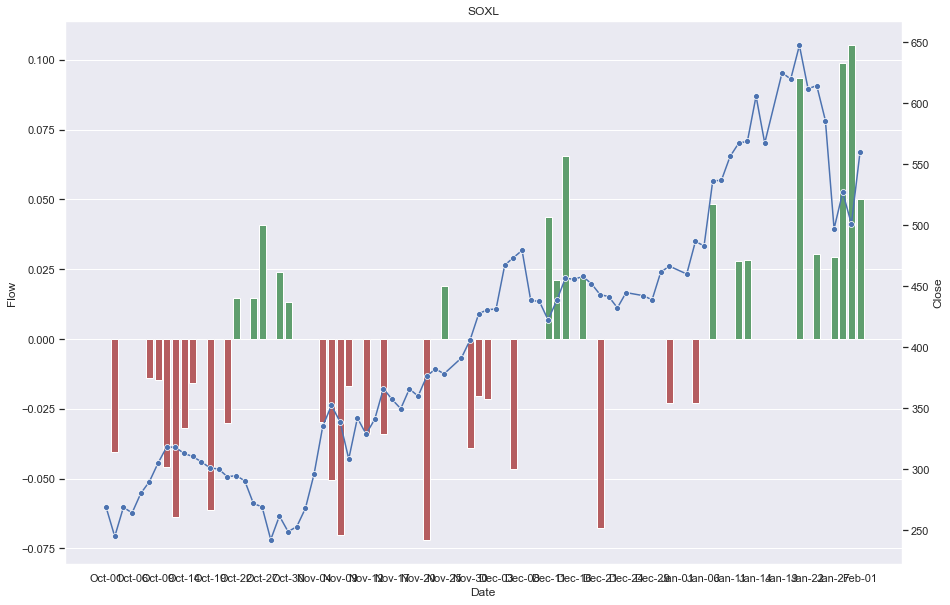

In [7]:
red_green = lambda r: 'r' if r['Flow'] < 0 else 'g'
line_and_bar_plot("SOXL", soxl_merged, bar_column='Flow', from_=from_, to_=to_, line_column='Close', 
                  x_ticks=50, fig_size=[15, 10], bar_palette_fn=red_green)